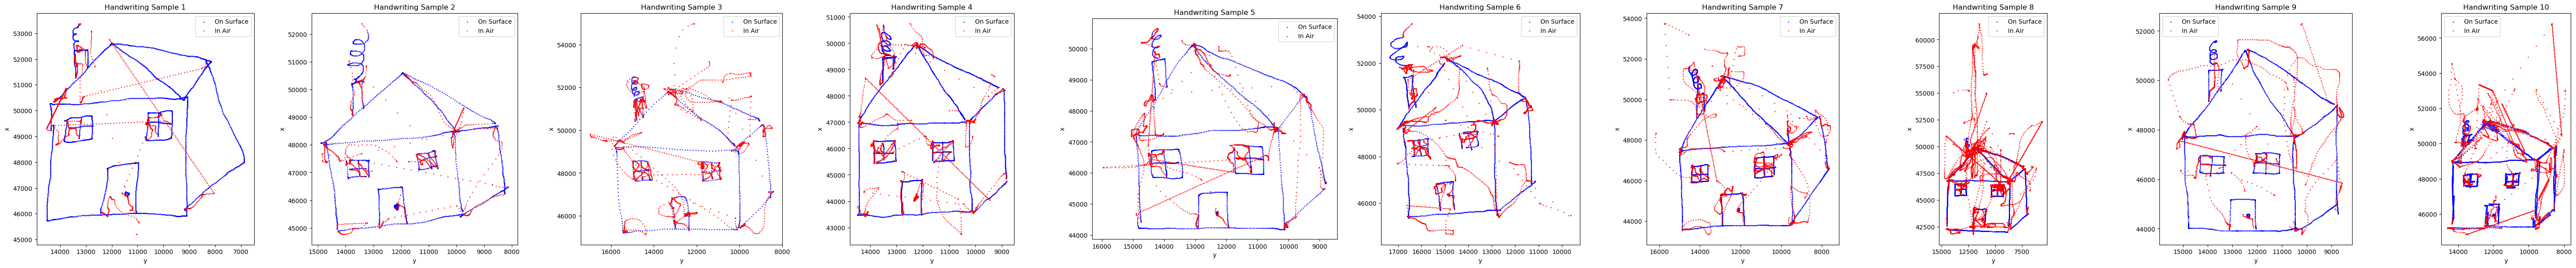

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def visualize_handwriting_from_directory(directory):
    # List all files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    num_files = len(files)
    
    if num_files == 0:
        print("No files found in the directory.")
        return
    
    # Create subplots for each file
    fig, axs = plt.subplots(1, num_files, figsize=(6 * num_files, 6), constrained_layout=True)
    if num_files == 1:
        axs = [axs]
    
    # Iterate over files and plot the data
    for i, filename in enumerate(files):
        file_path = os.path.join(directory, filename)
        try:
            # Assuming the file is whitespace-separated and has no header
            df = pd.read_csv(file_path, delim_whitespace=True, header=None)
            df.columns = ['x', 'y', 'timestamp', 'pen_status', 'pressure', 'azimuth', 'altitude']
            
            # Separate strokes based on pen status
            on_surface = df[df['pen_status'] == 1]
            in_air = df[df['pen_status'] == 0]

            # Scatter plot for strokes on surface and in air
            axs[i].scatter(on_surface['y'], on_surface['x'], c='b', s=1, alpha=0.7, label='On Surface')
            axs[i].scatter(in_air['y'], in_air['x'], c='r', s=1, alpha=0.7, label='In Air')
            axs[i].set_title(f'Handwriting Sample {i + 1}')
            axs[i].set_xlabel('y')
            axs[i].set_ylabel('x')
            axs[i].invert_xaxis()
            axs[i].set_aspect('equal')
            axs[i].legend()
        except Exception as e:
            print(f"Could not process file {filename}: {e}")
    
    plt.show()

# Usage Example:
# Specify the directory containing handwriting data
handwriting_data_directory = 'imputed'  # Change this to your actual directory path
visualize_handwriting_from_directory(handwriting_data_directory)
